In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
np.random.seed(0)

## 1. Load Data

In [2]:
# Read image files from directory
width = 24
height = 24

def read_imgs(path):
    x, y = [], []
    targets = ['cat', 'dog']
    for target in targets:
        files = os.listdir(path + '/' + target)
        for file in files:
            img = Image.open(path + '/' + target + '/' + file)
            img = img.resize((width, height), Image.BILINEAR).convert('L')
            img = np.array(img).flatten() / 255.
            x.append(img)
            y.append(target)
    return np.array(x), y

In [3]:
labels = ['cat', 'dog', 'butterfly', 'chicken', 'cow', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']

train_x, train_y = read_imgs("train")
test_x, test_y = read_imgs("test")

# convert string to number
train_y = np.array([labels.index(y) for y in train_y])
test_y = np.array([labels.index(y) for y in test_y])

# shuffle the data
idx = np.arange(len(train_y))
np.random.shuffle(idx)
train_x, train_y = train_x[idx], train_y[idx]

## 2. Classification with MLP

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(32,), activation='logistic', max_iter=2000, random_state=0)
clf.fit(train_x, train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(32,), max_iter=2000,
              random_state=0)

In [5]:
pred_y = clf.predict(train_x)
acc = accuracy_score(train_y, pred_y)
print(acc)

1.0


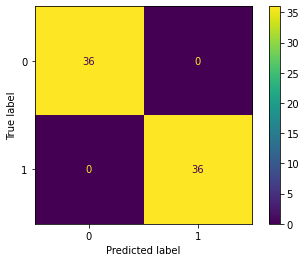

In [6]:
cm = confusion_matrix(train_y, pred_y)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [7]:
pred_y = clf.predict(test_x)
acc = accuracy_score(test_y, pred_y)
print(acc)

0.75


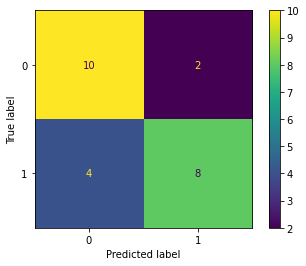

In [8]:
cm = confusion_matrix(test_y, pred_y)
disp = ConfusionMatrixDisplay(cm)
disp.plot()